<ipython-input-1-9b2a66a0db42>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2000-01-01', periods=240, freq='M')


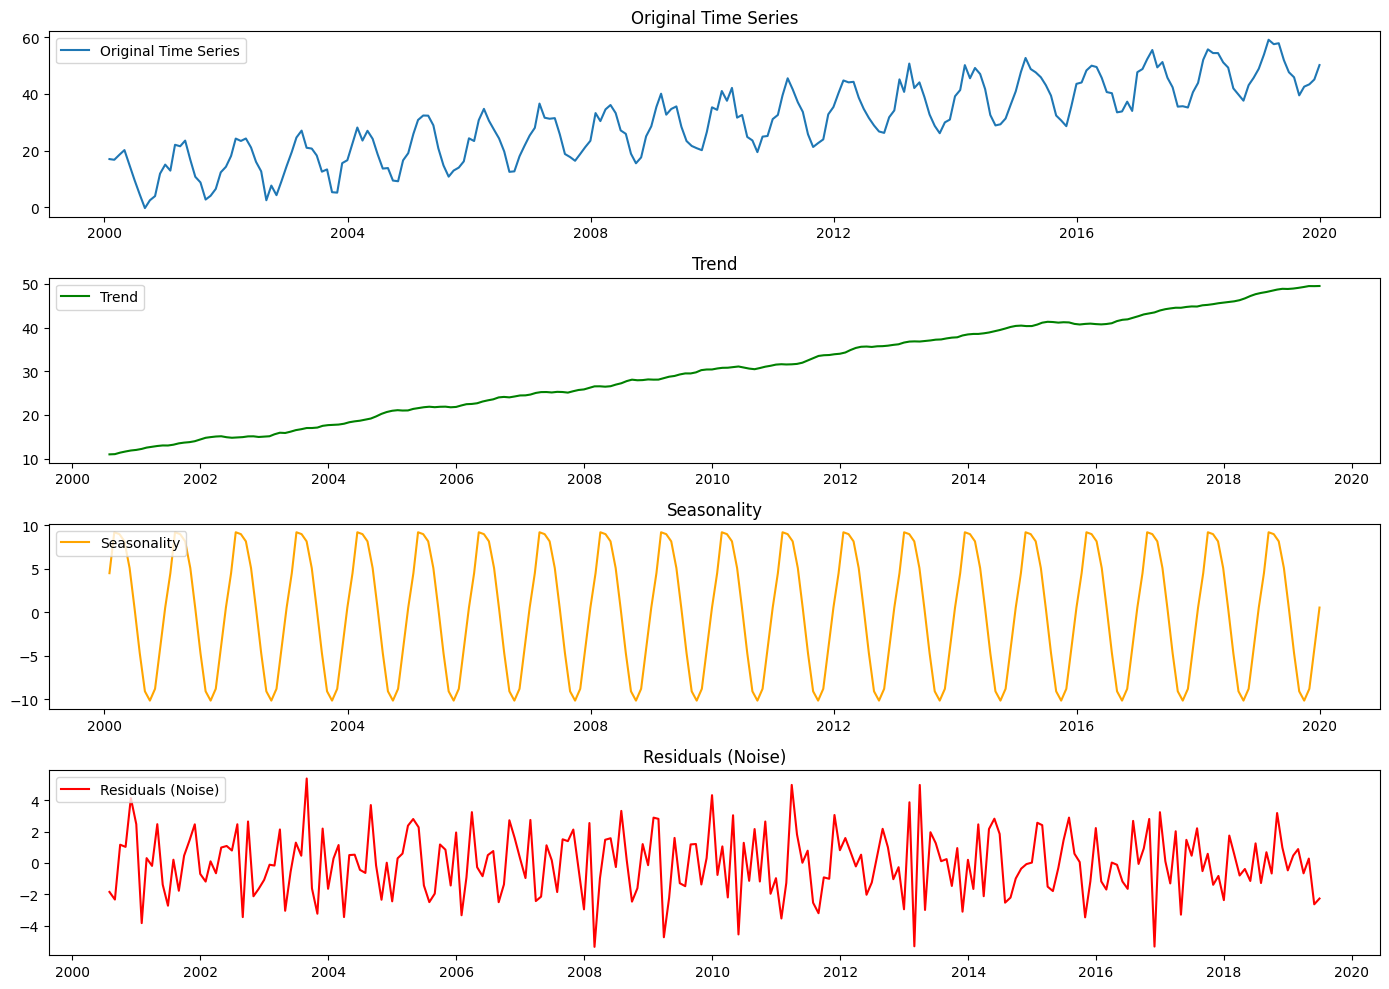

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# create a synthetic dataset
dates = pd.date_range(start='2000-01-01', periods=240, freq='M')
trend = np.linspace(10, 50, 240)
seasonal = 10 * np.sin(2 * np.pi * dates.month / 12)
noise = np.random.normal(0, 2, 240)

# combine components to create the synthetic time series
data = trend + seasonal + noise
df = pd.DataFrame({'value': data}, index=dates)

# cecompose time series
result = seasonal_decompose(df['value'], model='additive', period=12)

# visualize
plt.figure(figsize=(14, 10))

# original time series
plt.subplot(4, 1, 1)
plt.plot(df['value'], label='Original Time Series')
plt.legend(loc='upper left')
plt.title('Original Time Series')

# trend
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.title('Trend')

# seasonality
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality', color='orange')
plt.legend(loc='upper left')
plt.title('Seasonality')

# residual/noise
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals (Noise)', color='red')
plt.legend(loc='upper left')
plt.title('Residuals (Noise)')

plt.tight_layout()
plt.show()